In [207]:
import pandas as pd

In [208]:
df=pd.read_csv("Insurance_fraud_detection.csv")

In [209]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [210]:
df.shape

(1000, 40)

In [211]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [212]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [213]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [214]:
df=df.drop("_c39",axis=1)

In [215]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [216]:
print(df["months_as_customer"].unique())
print(df["months_as_customer"].dtypes)
print(df["months_as_customer"].value_counts())

[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309 396 273 419 315  7

In [217]:
print(df['age'].unique())
print(df['age'].dtypes)
print(df["age"].value_counts())

[48 42 29 41 44 39 34 37 33 61 23 38 58 26 31 62 55 40 35 43 45 25 30 28
 49 54 47 59 27 56 32 36 64 60 51 46 50 57 53 24 52 19 21 63 20 22]
int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64


In [218]:
print(df['policy_number'].unique())
print(df['policy_number'].dtypes)
print(df['policy_number'].value_counts())

[521585 342868 687698 227811 367455 104594 413978 429027 485665 636550
 543610 214618 842643 626808 644081 892874 558938 275265 921202 143972
 183430 431876 285496 115399 736882 699044 863236 608513 914088 596785
 908616 666333 336614 584859 990493 129872 200152 933293 485664 982871
 206213 616337 448961 790442 108844 430029 529112 939631 866931 582011
 691189 537546 394975 729634 282195 420810 524836 307195 623648 485372
 598554 303987 343161 519312 132902 332867 356590 346002 500533 348209
 486676 260845 657045 761189 175177 116700 166264 527945 627540 279422
 484200 645258 694662 960680 498140 498875 798177 614763 679370 958857
 686816 127754 918629 731450 307447 992145 900628 235220 740019 246882
 797613 193442 389238 760179 939905 872814 632627 283414 163161 853360
 776860 149367 395269 981123 143626 648397 154982 330591 319232 531640
 368050 253791 155724 824540 717392 965768 414779 428230 517240 469874
 718428 620215 618659 649082 437573 964657 932502 434507 935277 756054
 68238

In [219]:
print(df['policy_bind_date'].unique())
print(df['policy_bind_date'].dtypes)
print(df['policy_bind_date'].value_counts())

['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04-2004'
 '02-02-20

In [220]:
print(df['policy_state'].unique())
print(df['policy_state'].dtypes)

['OH' 'IN' 'IL']
object


In [221]:
print(df["policy_csl"].unique())
print(df["policy_csl"].dtypes)

['250/500' '100/300' '500/1000']
object


In [222]:
print(df["policy_deductable"].unique())
print(df["policy_deductable"].dtypes)

[1000 2000  500]
int64


In [223]:
print(df["policy_annual_premium"].unique())
print(df["policy_annual_premium"].dtypes)
print(df["policy_annual_premium"].value_counts())


[1406.91 1197.22 1413.14 1415.74 1583.91 1351.1  1333.35 1137.03 1442.99
 1315.68 1253.12 1137.16 1215.36  936.61 1301.13 1131.4  1199.44  708.64
 1374.22 1475.73 1187.96  875.15  972.18 1268.79  883.31 1266.92 1322.1
  848.07 1291.7  1104.5   954.16 1337.28 1088.34 1558.29 1415.68 1334.15
  988.45 1222.48 1155.55 1262.08 1451.62 1737.66 1475.93  538.17 1081.08
 1454.43 1240.47 1273.7  1123.87 1245.89 1326.62 1073.83 1530.52 1201.41
 1393.57 1276.57 1082.49 1414.74 1470.06  870.63  795.23 1168.2   993.51
 1848.81 1641.73 1362.87 1239.22  835.02 1061.33 1279.08 1105.49 1055.53
  895.83 1632.93 1405.99 1425.54 1038.09 1307.11 1489.24  976.67 1340.43
 1267.81 1234.2  1318.06  769.95 1514.72  873.64 1612.43 1318.24 1226.83
 1326.44 1136.83 1322.78 1483.25 1515.3  1075.18 1690.27 1352.83 1148.73
  969.5  1463.82 1474.17 1497.35 1427.14 1495.1  1141.62 1125.37 1207.36
 1338.5  1074.07 1337.56 1298.91 1222.75 1059.52 1124.38 1110.37 1103.58
 1269.76  964.79 1167.3  1625.45 1394.43 1053.24 104

In [224]:
print(df['umbrella_limit'].unique())
print(df['umbrella_limit'].dtypes)
print(df["umbrella_limit"].value_counts())

[       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
 10000000 -1000000  2000000]
int64
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


In [225]:
print(df["insured_zip"].unique())
print(df["insured_zip"].value_counts())
print(df["insured_zip"].dtypes)

[466132 468176 430632 608117 610706 478456 441716 603195 601734 600983
 462283 615561 432220 464652 476685 458733 619884 470610 472135 477670
 618845 442479 443920 453148 434733 613982 436984 607730 609837 432211
 473328 610393 614780 472248 603381 479224 430141 620757 615901 474615
 456446 470577 441648 433782 468104 459407 472573 433473 446326 435481
 477310 609930 603993 437818 478423 467784 606714 464691 431683 431725
 609216 452787 468767 435489 450149 458364 476458 602433 478575 449718
 463181 441992 452597 614417 472895 475847 476978 600648 608335 471600
 441175 603123 457767 618498 605486 617970 432934 456762 601748 607763
 436973 471300 453277 465100 603248 601112 438830 464959 439787 464839
 448984 440327 460742 446895 609374 451672 604450 432896 618929 451312
 605141 459504 432781 452748 618316 455365 470603 475292 467743 460675
 618123 607452 606352 603527 445601 603948 435758 611586 465263 617858
 607889 455689 450341 431277 454656 605169 444822 447442 474360 447925
 45158

In [226]:
print(df['insured_sex'].unique())
print(df['insured_sex'].value_counts())
print(df['insured_sex'].dtypes)

['MALE' 'FEMALE']
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
object


In [227]:
print(df['insured_education_level'].unique())
print(df['insured_education_level'].value_counts())
print(df['insured_education_level'].dtypes)

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
object


In [228]:
print(df['insured_occupation'].unique())
print(df['insured_occupation'].value_counts())
print(df['insured_occupation'].dtypes)

['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
object


In [229]:
print(df["insured_hobbies"].unique())
print(df["insured_hobbies"].value_counts())
print(df["insured_hobbies"].dtypes)

['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
object


In [230]:
print(df["insured_relationship"].unique())
print(df["insured_relationship"].value_counts())
print(df["insured_relationship"].dtypes)

['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
object


In [231]:
print(df["capital-gains"].unique())
print(df["capital-gains"].value_counts())
print(df["capital-gains"].dtypes)

[ 53300      0  35100  48900  66000  38400  52800  41300  55700  63600
  53500  45500  57000  46700  72700  31000  53200  27500  81100  51400
  65700  48500  49700  36400  35300  88400  47600  71500  36100  56600
  94800  36900  69100  62400  35700  43400  59600  43300  56200  37800
  78300  52700  57300    800  55200  90700  67700  61500  37300  50500
  34300  28800  52600  34400  62000  41200  44300  58000  51100  47200
  70500  40700  42400  57900  60000  65300  84900  45300  68900  46300
  76000  58600  54100  58100  13100  31900  17600  52000  29000  62500
  39600  47700  38100  71400  75400  88800  53900  27000  72200  29600
  51000  62700  25000  68500  42900  29300  45100  63100  66400  25500
  59900  62200  24000  24800  47800  53000  24400  65600  39900  40600
  33300  54000  60300  25900  47500  41500  44400  51500  52100  57800
  55400  71200  91900  62800  49900  53100  55600  37600  47400  26900
  68700  64200  27100  20000  34000  82400  44000  81300  39000  43900
  3940

In [232]:
print(df["capital-loss"].unique())
print(df["capital-loss"].value_counts())
print(df["capital-loss"].dtypes)

[      0  -62400  -46000  -77000  -39300  -51000  -32800  -55500  -37800
  -27300  -68200  -31000  -53500  -29200  -30200  -55600  -64000  -49200
  -55700  -24100  -67400  -60200  -28700  -40300  -46500  -39600  -55000
  -45800  -58500  -49500  -49000  -91200  -66200  -51500  -50000  -50300
  -42900  -19700  -45000  -40600  -80600  -44200  -78600  -56100  -20800
  -58400  -71700  -72300  -31700  -58100  -24300  -56400  -57000  -47500
  -38800  -41000  -56800  -63100  -36200  -53700  -69700  -32100  -47300
  -54800  -45200  -65600  -20400  -77500  -43200  -56200  -57900  -57100
  -38200  -44600  -44500  -66900  -82400  -54000  -59100  -59300  -31400
  -26900  -51100  -59900  -88300  -41300  -45100  -58900  -22300  -30300
  -51300  -57700  -39200  -67900  -57500  -90200  -13800  -34400  -36700
  -39700  -58600  -72500  -60500  -37100  -67800  -68700  -32500  -24400
  -10600  -74500  -53800  -70300  -24700  -41400  -52600  -70200  -47100
  -33600  -33100  -46900  -61000  -53300  -19800  -

In [233]:
print(df["incident_date"].unique())
print(df["incident_date"].value_counts())
print(df["incident_date"].dtypes)

['25-01-2015' '21-01-2015' '22-02-2015' '10-01-2015' '17-02-2015'
 '02-01-2015' '13-01-2015' '27-02-2015' '30-01-2015' '05-01-2015'
 '06-01-2015' '15-02-2015' '22-01-2015' '08-01-2015' '15-01-2015'
 '29-01-2015' '19-01-2015' '01-01-2015' '10-02-2015' '11-01-2015'
 '24-02-2015' '09-01-2015' '28-01-2015' '07-01-2015' '18-01-2015'
 '28-02-2015' '12-02-2015' '24-01-2015' '03-01-2015' '16-01-2015'
 '14-02-2015' '21-02-2015' '18-02-2015' '26-02-2015' '17-01-2015'
 '27-01-2015' '11-02-2015' '12-01-2015' '06-02-2015' '20-01-2015'
 '02-02-2015' '20-02-2015' '08-02-2015' '23-02-2015' '01-03-2015'
 '14-01-2015' '19-02-2015' '09-02-2015' '26-01-2015' '23-01-2015'
 '31-01-2015' '03-02-2015' '01-02-2015' '05-02-2015' '25-02-2015'
 '16-02-2015' '13-02-2015' '04-02-2015' '07-02-2015' '04-01-2015']
02-02-2015    28
17-02-2015    26
07-01-2015    25
24-01-2015    24
10-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
06-02-2015    20
22-

In [234]:
print(df["incident_type"].unique())
print(df["incident_type"].value_counts())
print(df["incident_type"].dtypes)

['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
object


In [235]:
print(df["collision_type"].unique())
print(df["collision_type"].value_counts())
print(df["collision_type"].dtypes)

['Side Collision' '?' 'Rear Collision' 'Front Collision']
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
object


In [236]:
print(df["incident_severity"].unique())
print(df["incident_severity"].value_counts())
print(df["incident_severity"].dtypes)

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
object


In [237]:
print(df["authorities_contacted"].unique())
print(df["authorities_contacted"].value_counts())
print(df["authorities_contacted"].dtypes)

['Police' 'None' 'Fire' 'Other' 'Ambulance']
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
object


In [238]:
print(df["incident_state"].unique())
print(df["incident_state"].value_counts())
print(df["incident_state"].dtypes)

['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64
object


In [239]:
print(df["incident_city"].unique())
print(df["incident_city"].value_counts())
print(df["incident_city"].dtypes)

['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend'
 'Northbrook']
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64
object


In [240]:
print(df["incident_location"].unique())
print(df["incident_location"].value_counts())
print(df["incident_location"].dtypes)

['9935 4th Drive' '6608 MLK Hwy' '7121 Francis Lane' '6956 Maple Drive'
 '3041 3rd Ave' '8973 Washington St' '5846 Weaver Drive' '3525 3rd Hwy'
 '4872 Rock Ridge' '3066 Francis Ave' '1558 1st Ridge' '5971 5th Hwy'
 '6655 5th Drive' '6582 Elm Lane' '6851 3rd Drive' '9573 Weaver Ave'
 '5074 3rd St' '4546 Tree St' '3842 Solo Ridge' '8101 3rd Ridge'
 '5380 Pine St' '8957 Weaver Drive' '2526 Embaracadero Ave'
 '5667 4th Drive' '2502 Apache Hwy' '3418 Texas Lane' '2533 Elm St'
 '3790 Andromedia Hwy' '3220 Rock Drive' '2100 Francis Drive'
 '4687 5th Drive' '9038 2nd Lane' '6092 5th Ave' '8353 Britain Ridge'
 '3540 Maple St' '3104 Sky Drive' '4981 Weaver St' '6676 Tree Lane'
 '3930 Embaracadero St' '3422 Flute St' '4862 Lincoln Hwy' '5719 2nd Lane'
 '3221 Solo Ridge' '6660 MLK Drive' '1699 Oak Drive' '4234 Cherokee Lane'
 '7476 4th St' '8907 Tree Ave' '6619 Flute Ave' '6011 Britain St'
 '5104 Francis Drive' '2280 4th Ave' '2644 Elm Drive' '7466 MLK Ridge'
 '5821 2nd St' '6723 Best Drive' '4866

In [241]:
print(df["incident_hour_of_the_day"].unique())
print(df["incident_hour_of_the_day"].value_counts())
print(df["incident_hour_of_the_day"].dtypes)

[ 5  8  7 20 19  0 23 21 14 22  9 12 15  6 16  4 10  1 17  3 11 13 18  2]
17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64
int64


In [242]:
print(df["number_of_vehicles_involved"].unique())
print(df["number_of_vehicles_involved"].value_counts())
print(df["number_of_vehicles_involved"].dtypes)

[1 3 4 2]
1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64
int64


In [243]:
print(df["property_damage"].unique())
print(df["property_damage"].value_counts())
print(df["property_damage"].dtypes)

['YES' '?' 'NO']
?      360
NO     338
YES    302
Name: property_damage, dtype: int64
object


In [244]:
print(df["bodily_injuries"].unique())
print(df["bodily_injuries"].value_counts())
print(df["bodily_injuries"].dtypes)

[1 0 2]
0    340
2    332
1    328
Name: bodily_injuries, dtype: int64
int64


In [245]:
print(df["witnesses"].unique())
print(df["witnesses"].value_counts())
print(df["witnesses"].dtypes)

[2 0 3 1]
1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64
int64


In [246]:
print(df["police_report_available"].unique())
print(df["police_report_available"].value_counts())
print(df["police_report_available"].dtypes)

['YES' '?' 'NO']
NO     343
?      343
YES    314
Name: police_report_available, dtype: int64
object


In [247]:
print(df["total_claim_amount"].unique())
print(df["total_claim_amount"].value_counts())
print(df["total_claim_amount"].dtypes)

[ 71610   5070  34650  63400   6500  64100  78650  51590  27700  42300
  87010 114920  56520   7280  46200  63120  52110  77880  72930  60400
  47160  37840  71520  98160  71500   9020   5720  69840  91650  75600
  67140  29790  77110  64800  53100  60200   5330  62300  60170  40000
  97080  51660  51120  56400  55120  62800   7290  76600  81800   7260
   4300  70510   2640  78900  56430   2400  65790  62920  69480  44280
  56300  68520  59130  82320  89700  33930  68530  68310  61290  30100
  57120  42930  51210  89400  59730   8060  72200  50800   6600   7500
   6490  60940  58300  68400  64240   4700  45120  66950  98340   5900
  70680  93720   6930  64890   5400   5600  79300  52800  28800   2970
  93480   4320  79800  74200  70590  74700  70000  81070  57720   7080
  47700  51260  70400  90000  72820  69300  76560  55440  77130  42000
  36300  40320   3960  63840  44730  84720  61500  51000  46800  78120
  69200   3690  65500  76120  73560  52030   5170   8190  70800  45630
  9932

In [248]:
print(df["injury_claim"].unique())
print(df["injury_claim"].value_counts())
print(df["injury_claim"].dtypes)

[ 6510   780  7700  6340  1300  6410 21450  9380  2770  4700  7910 17680
  4710  1120  4200 10520  5790 14160  6630  6040     0 17880  8180  7080
 16500  1640  1040  7760 14100 12600  7460  3310 14020 10800 10620  6020
  1230 12460 10940  8000 16180  5740  5680 11280  6890  6280   810 15320
 16360  1320   430 12820   480 15780   300  7310 11440 15440  7380  5630
 11420  6570 13720 13800   860 12420  6810  3010  9520  9540 11380 14900
 10860  1240 14440 10160   660   750  1180  5540  5830 11400 11680   940
 10300  8940   590  5890 17040  1260  7210   900   700 15860 10560   330
 15580  6650  7420  7470 14000 14740 14430  4770  9320  6400 18000 13240
 13860 12760  8570  7000  3300  5760 10640  4970 14120  6150  8500  4680
 17360 13840   410  6550 12260  9460   470  1890  5070  7640 12800  4730
  8960 17280  7520 10680  9780 10540  9040 13040   560 11700 10790 18180
 11160 12960   670 11940  6700  4990 11100   610 15920  8560 13100   450
 10220 16800 16540 14880  5490  8060  2250  1100 13

In [249]:
print(df["property_claim"].unique())
print(df["property_claim"].value_counts())
print(df["property_claim"].dtypes)

[13020   780  3850  6340   650  6410  7150  9380  2770  4700 15820 17680
  9420  1120  8400 10520  5790  7080 13260  6040  5240  4730  5960 16360
 14160 11000   820   520 15520 14100 12600  7460  3310 14020  5400  5310
  6020  6230 10940  4000 16180  5740  5680 11280     0  6280   810  7660
  8180   660   430 12820   480  7890  6270   300  7310  5720  3690 11260
  5710  6570  6860 13800  3770   860  6210  6810  4760  4770  5690  7450
 10860  1240  7220 10160  1320  1500  1180 11080 11660 11400 11680   470
  5640 10300 17880   590 11780  8520   630  6630  7210   900   700 15860
  5280  3600   330  7790 19950 14840 14940  7000 14740  9620  9540  9320
 12800  9000  6620 13860 12760  6160 17140  9900  5760 10640  4970 14120
 12300  8500  9360  8680  6920   410  6550 12260   940  1260  5070 15280
  6400  8960 17280 15040  5340  9780 10540  9040 14420 13040   620  1680
 11700 13240 21580 18180  5580 12960   670  7960  6700  4990  7400  1220
 15920  8560 11380 13100  5110 16800 16540  7440  5

In [250]:
print(df["vehicle_claim"].unique())
print(df["vehicle_claim"].value_counts())
print(df["vehicle_claim"].dtypes)

[52080  3510 23100 50720  4550 51280 50050 32830 22160 32900 63280 79560
 42390  5040 33600 42080 40530 56640 53040 48320 41920 33110 47680 73620
 44000  6560  4160 46560 63450 50400 52220 23170 49070 48600 37170 48160
  3280 43610 38290 28000 64720 40180 39760 33840 48230 63090 50240  5670
 53620 57260  5280  3440 44870  1680 55230 50160  1800 51170 45760 54040
 33210 39410 51390 45990 61740 62100 30160 49840  2580 49680 47670 27090
 42840 28620 34140 67050 38010  5580 50540 30480  4620  5250  4130 44320
 40810 45600 40880  3290 39480 46350 71520  4720 53010 68160 59670 50470
  3600  4200 47580 36960 25200  2310 70110  3360 53200 51940 48870 52290
 49000 51590 33670 33390 32620 51200 63000 52960 41580 51040 49280 51420
 28800  2970 42560 34790 56480 43050 34000 32760 48440  2870 52400 55360
 49040 37840  3760 49560 35490 76400 44800 53760 77760 60160 32040 44010
 42160 36160 37280 52160  4340  3920 52650 59580 75530 63630 44640 45360
  5360 31840 40200 34930 29600  4270 47760 59920 39

In [251]:
print(df["auto_make"].unique())
print(df["auto_make"].value_counts())
print(df["auto_make"].dtypes)

['Saab' 'Mercedes' 'Dodge' 'Chevrolet' 'Accura' 'Nissan' 'Audi' 'Toyota'
 'Ford' 'Suburu' 'BMW' 'Jeep' 'Honda' 'Volkswagen']
Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
object


In [252]:
print(df["auto_model"].unique())
print(df["auto_model"].value_counts())
print(df["auto_model"].dtypes)

['92x' 'E400' 'RAM' 'Tahoe' 'RSX' '95' 'Pathfinder' 'A5' 'Camry' 'F150'
 'A3' 'Highlander' 'Neon' 'MDX' 'Maxima' 'Legacy' 'TL' 'Impreza'
 'Forrestor' 'Escape' 'Corolla' '3 Series' 'C300' 'Wrangler' 'M5' 'X5'
 'Civic' 'Passat' 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion'
 'Jetta' 'ML350' 'Ultima' 'Grand Cherokee']
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Forrestor         28
Camry             28
92x               28
E400              27
F150              27
95                27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
X5                23
Ultima            23
Silverado         22
Highlander        22
Civic             22
Fusion            21
Impreza           20
ML350             20
Corolla           20
TL                20
CRV

In [253]:
print(df["auto_year"].unique())
print(df["auto_year"].value_counts())
print(df["auto_year"].dtypes)

[2004 2007 2014 2009 2003 2012 2015 1996 2002 2006 2000 2010 1999 2011
 2005 2008 1995 2001 1998 1997 2013]
1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64
int64


In [254]:
print(df["fraud_reported"].unique())
print(df["fraud_reported"].value_counts())
print(df["fraud_reported"].dtypes)

['Y' 'N']
N    753
Y    247
Name: fraud_reported, dtype: int64
object


In [255]:
#Converting policy_deductable feature from int to object type
df["policy_deductable"]= df.policy_deductable.astype("object")
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable               object
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [256]:
df["property_damage"]=df["property_damage"].replace("?","unknown")
df["property_damage"].unique()

array(['YES', 'unknown', 'NO'], dtype=object)

In [257]:
df["police_report_available"]=df["police_report_available"].replace("?","unknown")
df["police_report_available"].unique()

array(['YES', 'unknown', 'NO'], dtype=object)

In [258]:
df["collision_type"]=df["collision_type"].replace("?","unknown")
df["collision_type"].unique()

array(['Side Collision', 'unknown', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [259]:
df=df.drop(columns=["incident_location","incident_date","policy_bind_date","policy_number"],axis=1)

In [260]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [261]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable               object
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [262]:
#Separate categorical and numberical columns
cat_set = df.dtypes[df.dtypes == 'object']
num_set = df.dtypes[df.dtypes != 'object']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012698B8A048>,
      dtype=object)

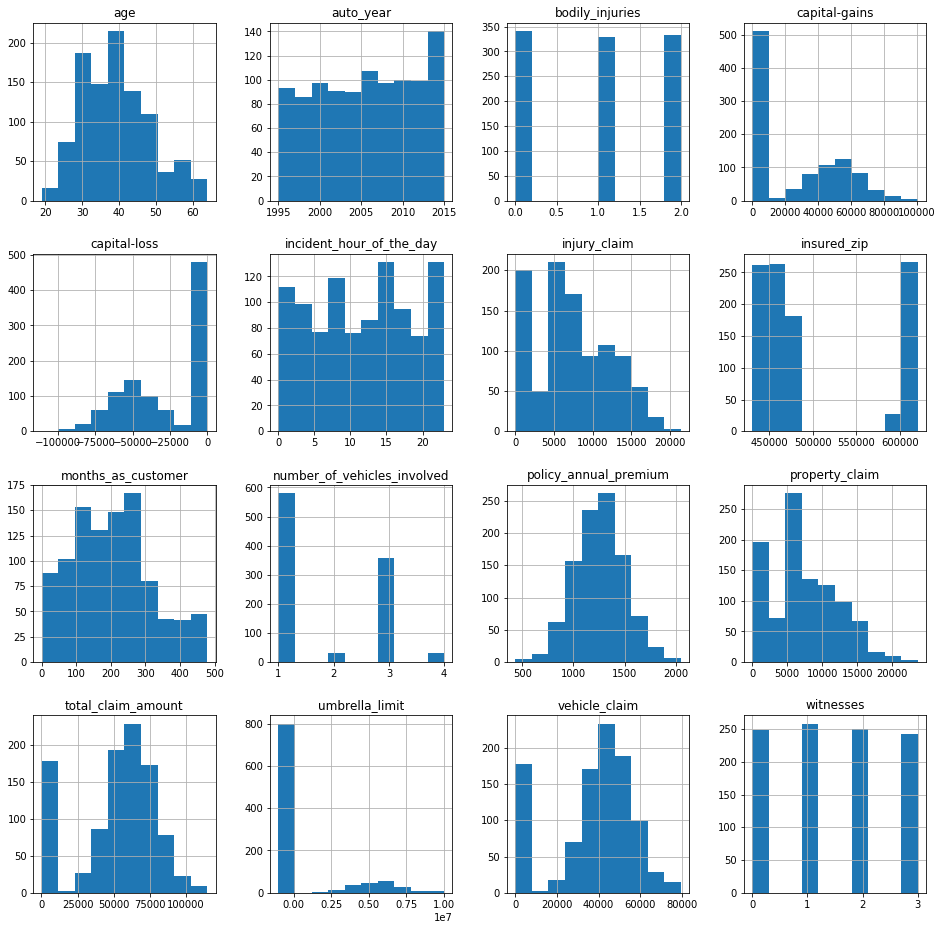

In [263]:
df[list(num_set.index)].hist(figsize = (16,16))

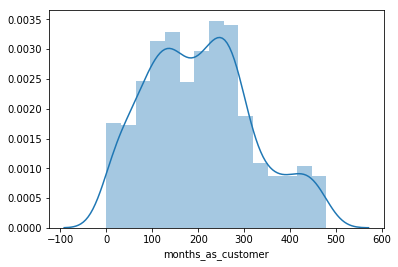

In [264]:
sns.distplot(df["months_as_customer"])

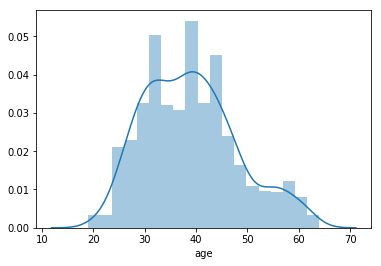

In [265]:
sns.distplot(df["age"])

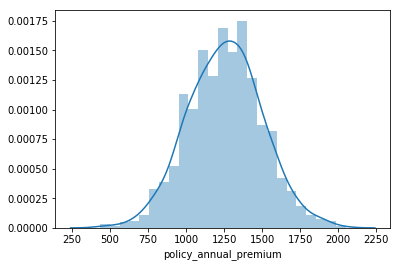

In [266]:
sns.distplot(df["policy_annual_premium"])

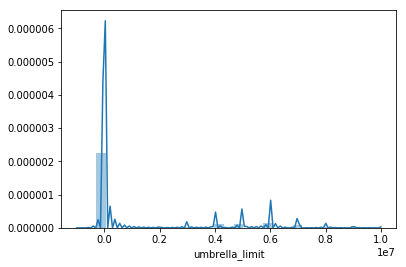

In [267]:
sns.distplot(df["umbrella_limit"])

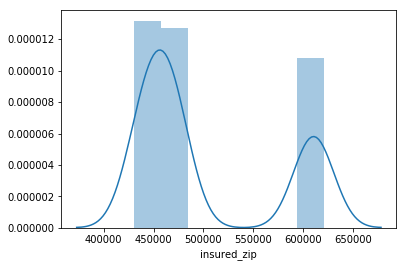

In [268]:
sns.distplot(df["insured_zip"])

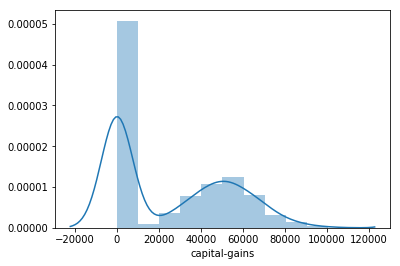

In [269]:
sns.distplot(df["capital-gains"])

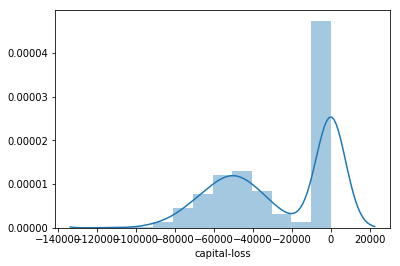

In [270]:
sns.distplot(df["capital-loss"])

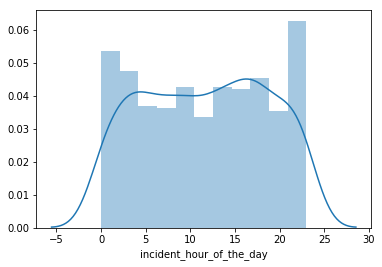

In [271]:
sns.distplot(df["incident_hour_of_the_day"])

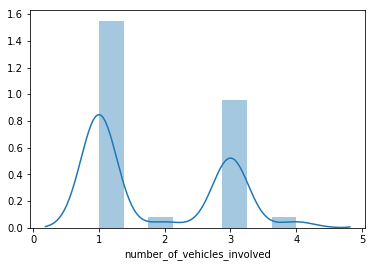

In [272]:
sns.distplot(df["number_of_vehicles_involved"])

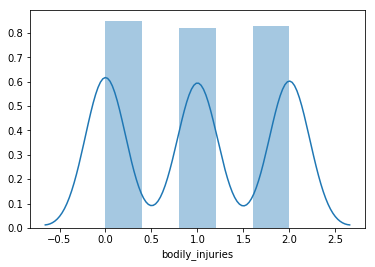

In [273]:
sns.distplot(df["bodily_injuries"])

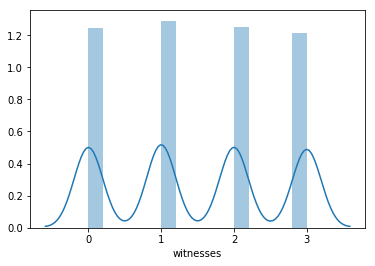

In [274]:
sns.distplot(df["witnesses"])

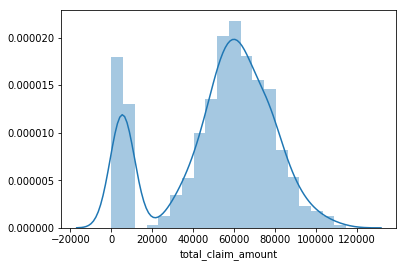

In [275]:
sns.distplot(df["total_claim_amount"])

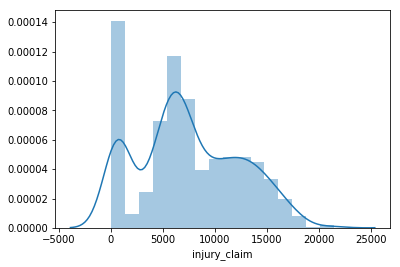

In [276]:
sns.distplot(df["injury_claim"])

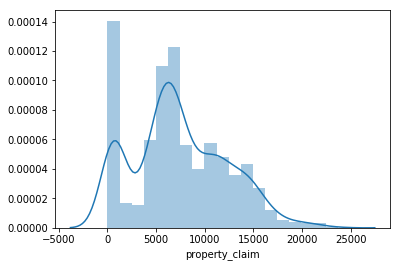

In [277]:
sns.distplot(df["property_claim"])

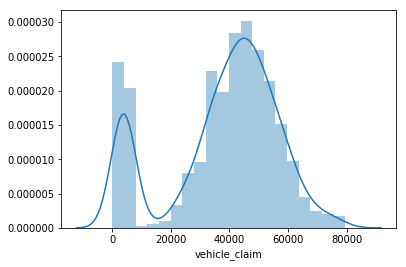

In [278]:
sns.distplot(df["vehicle_claim"])

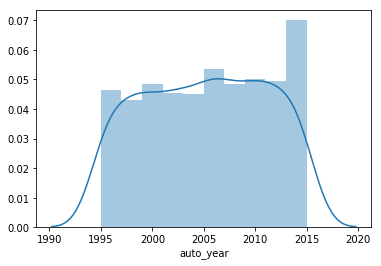

In [279]:
sns.distplot(df["auto_year"])

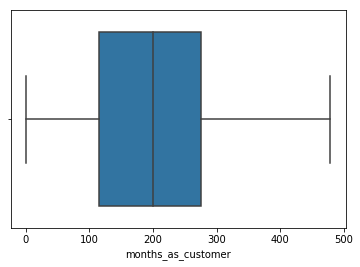

In [280]:
sns.boxplot(df["months_as_customer"])


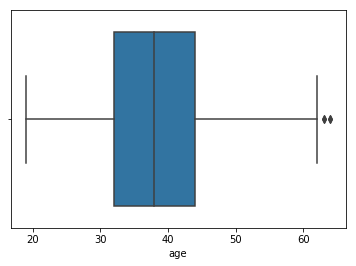

In [281]:
sns.boxplot(df["age"])


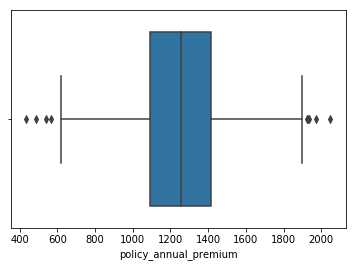

In [282]:
sns.boxplot(df["policy_annual_premium"])


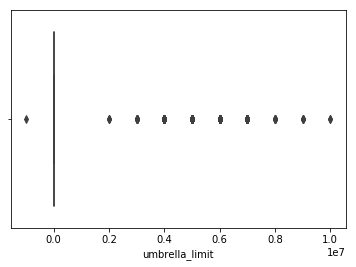

In [283]:
sns.boxplot(df["umbrella_limit"])


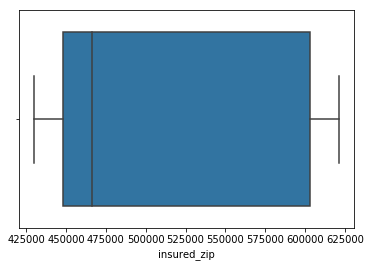

In [284]:
sns.boxplot(df["insured_zip"])                   


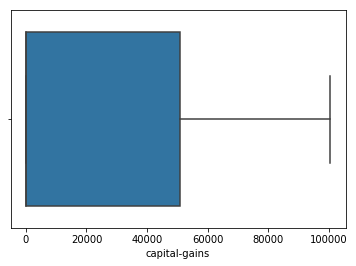

In [285]:
sns.boxplot(df["capital-gains"]) 


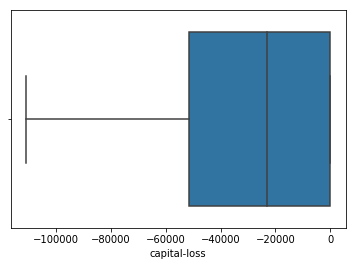

In [286]:
sns.boxplot(df["capital-loss"]) 


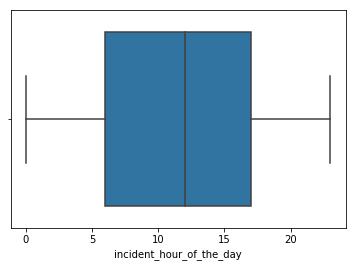

In [287]:
sns.boxplot(df["incident_hour_of_the_day"])


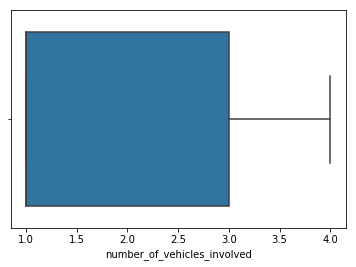

In [288]:
sns.boxplot(df["number_of_vehicles_involved"])

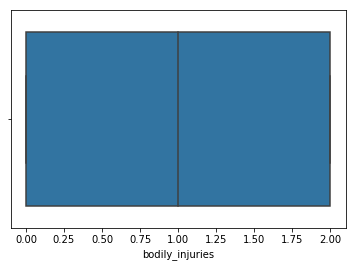

In [289]:
sns.boxplot(df["bodily_injuries"])


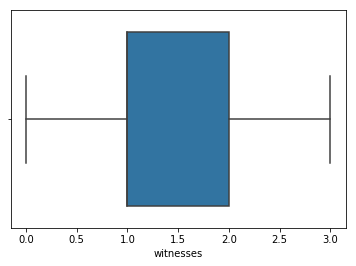

In [290]:
sns.boxplot(df["witnesses"])


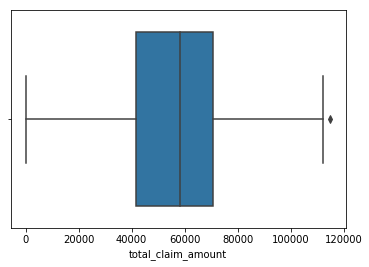

In [291]:
sns.boxplot(df["total_claim_amount"])


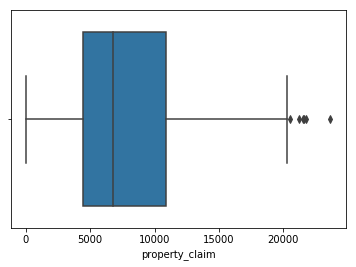

In [292]:
sns.boxplot(df["property_claim"])

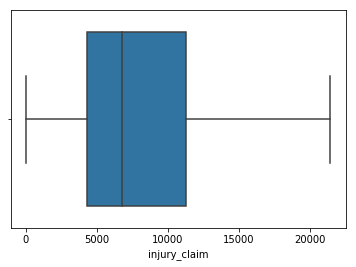

In [293]:
sns.boxplot(df["injury_claim"])

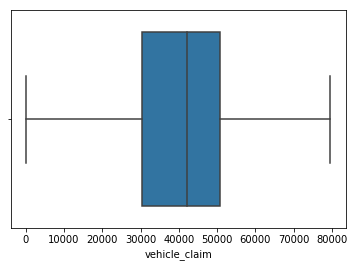

In [294]:
sns.boxplot(df["vehicle_claim"])

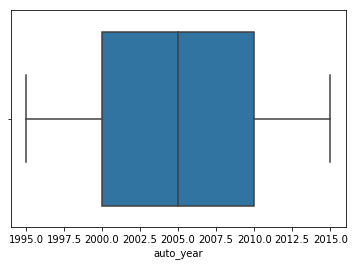

In [295]:
sns.boxplot(df["auto_year"])

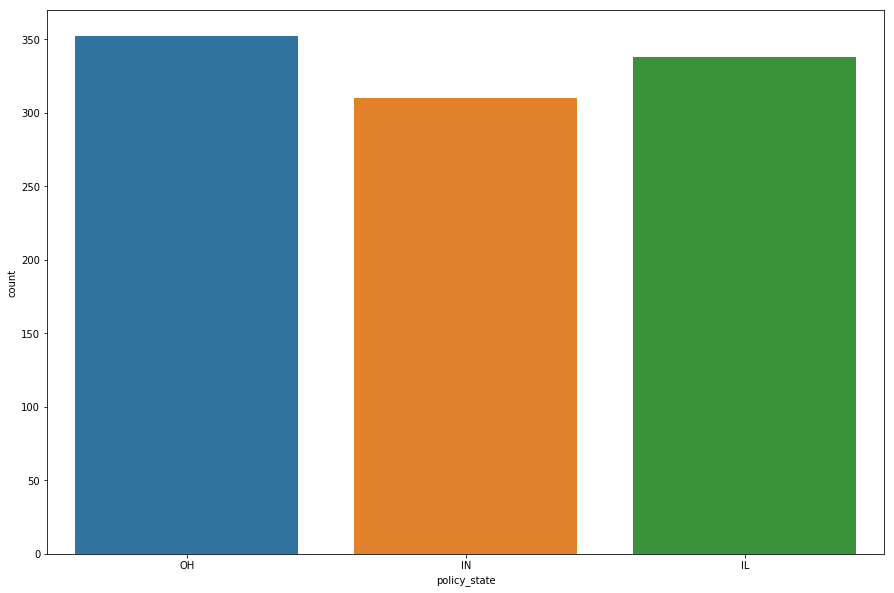

In [296]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="policy_state",data=df)


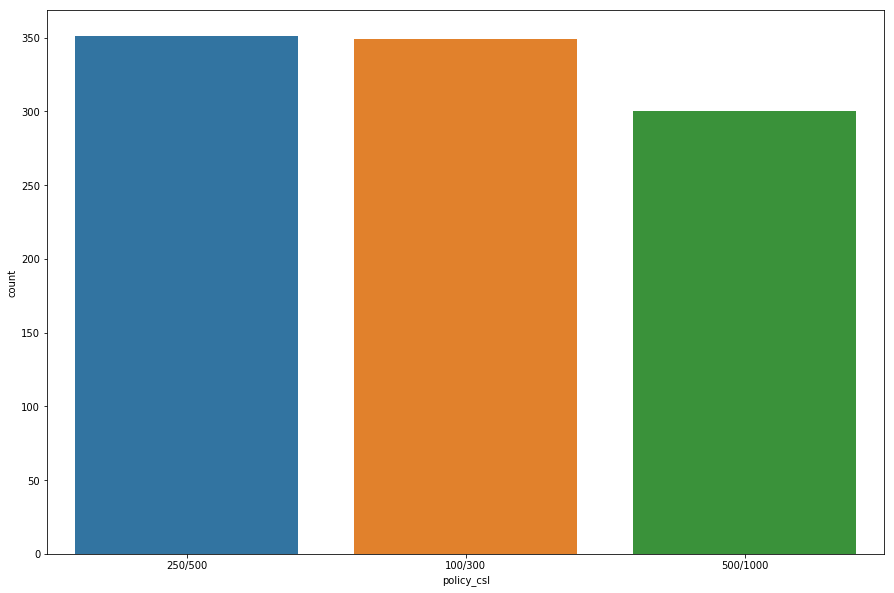

In [297]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="policy_csl",data=df)


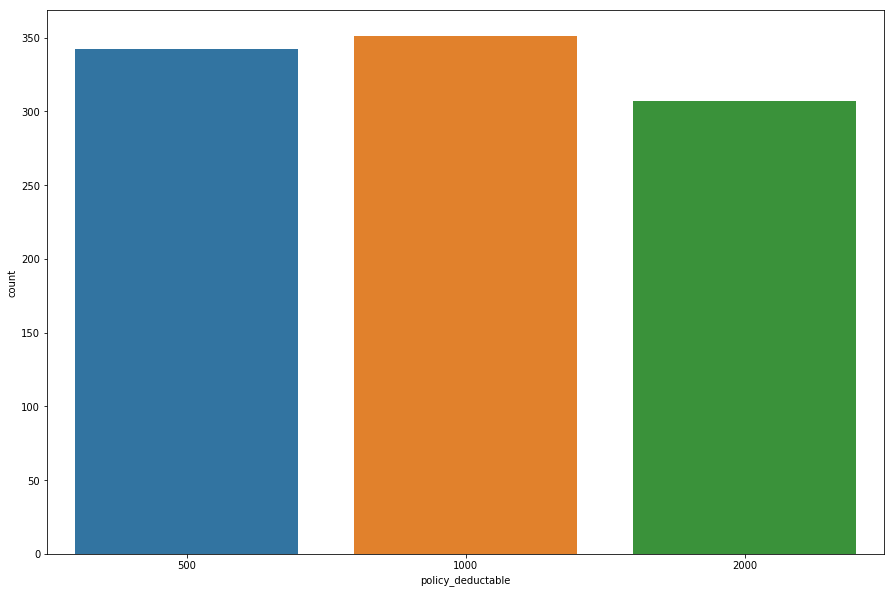

In [298]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="policy_deductable",data=df)

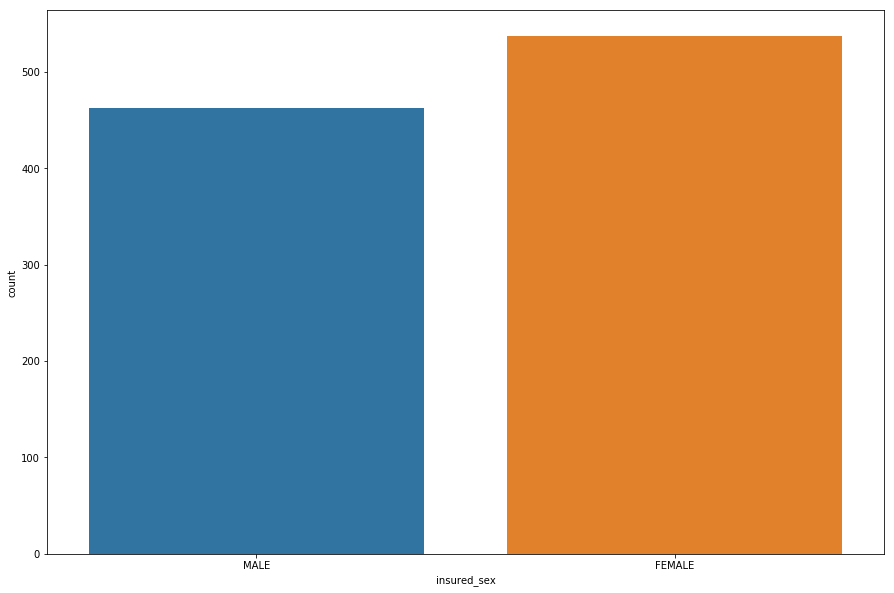

In [299]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="insured_sex",data=df)

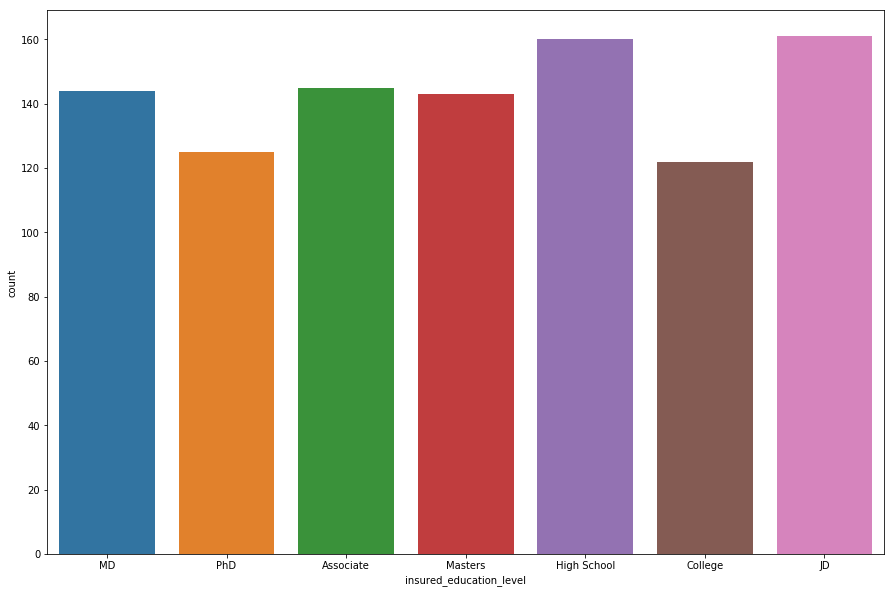

In [300]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="insured_education_level",data=df)

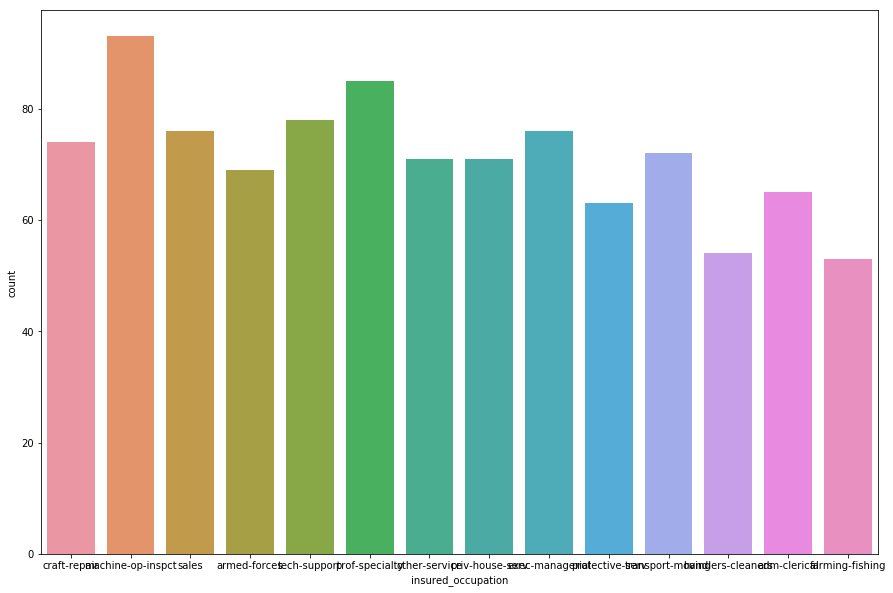

In [301]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="insured_occupation",data=df)

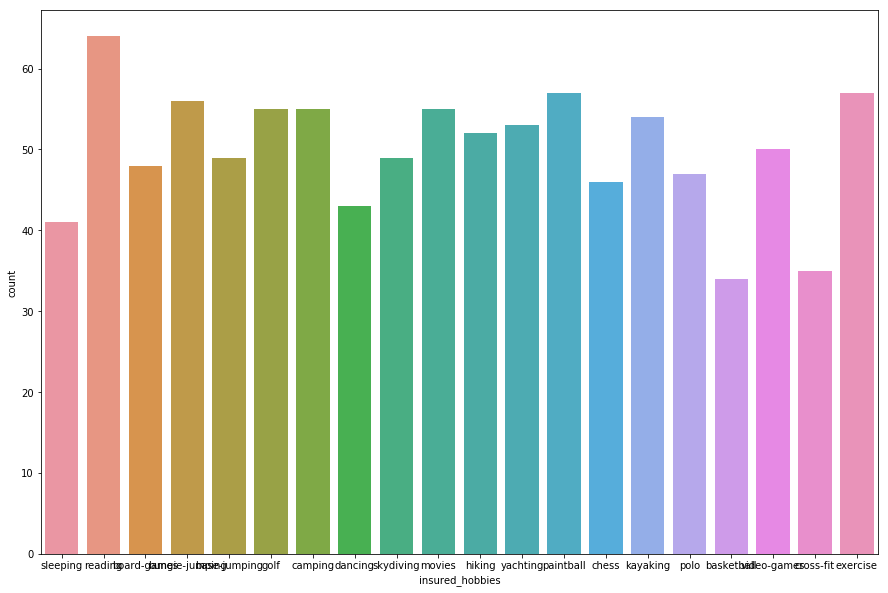

In [302]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="insured_hobbies",data=df)

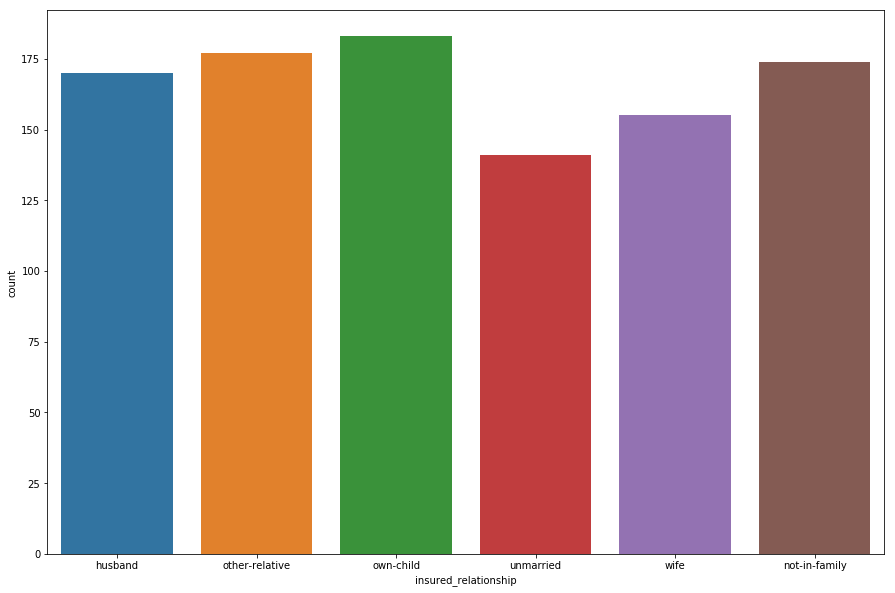

In [303]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="insured_relationship",data=df)

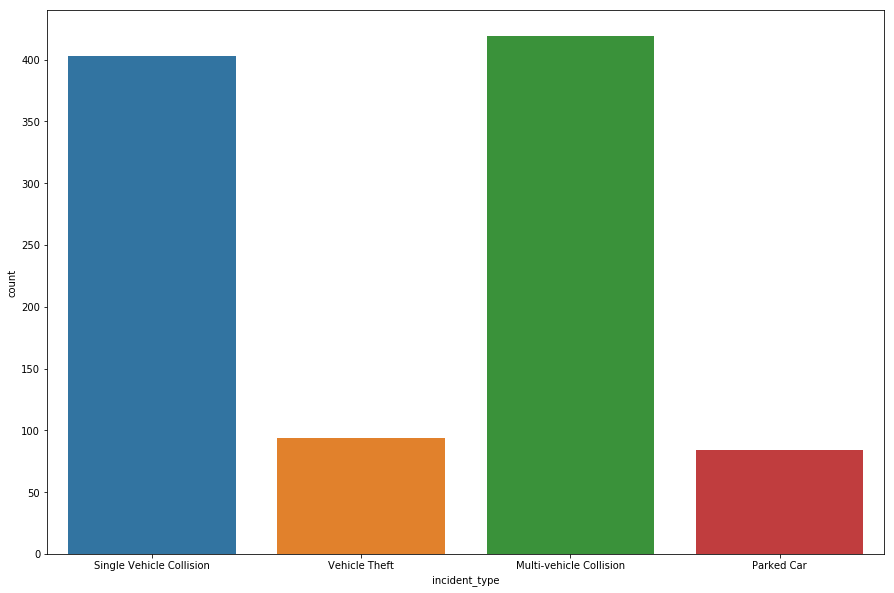

In [304]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="incident_type",data=df)

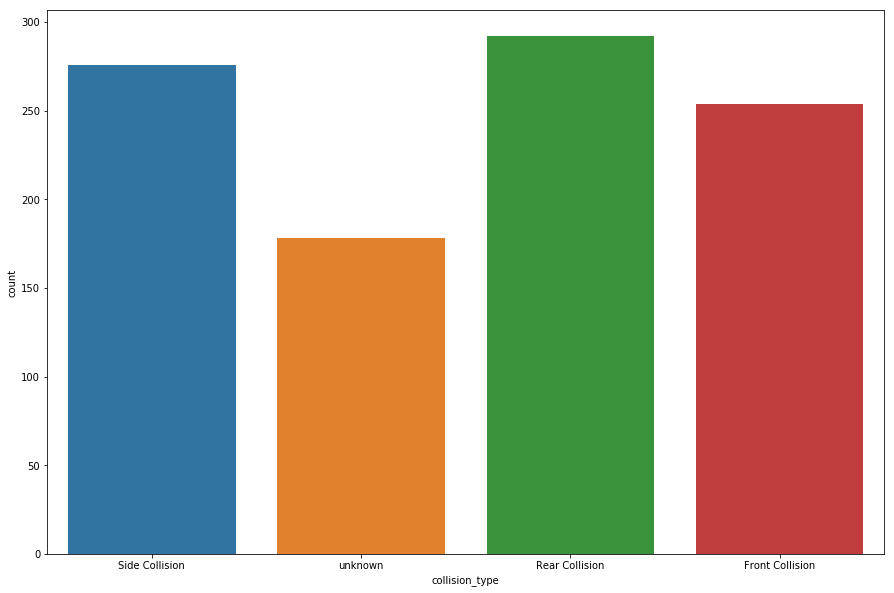

In [305]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="collision_type",data=df)

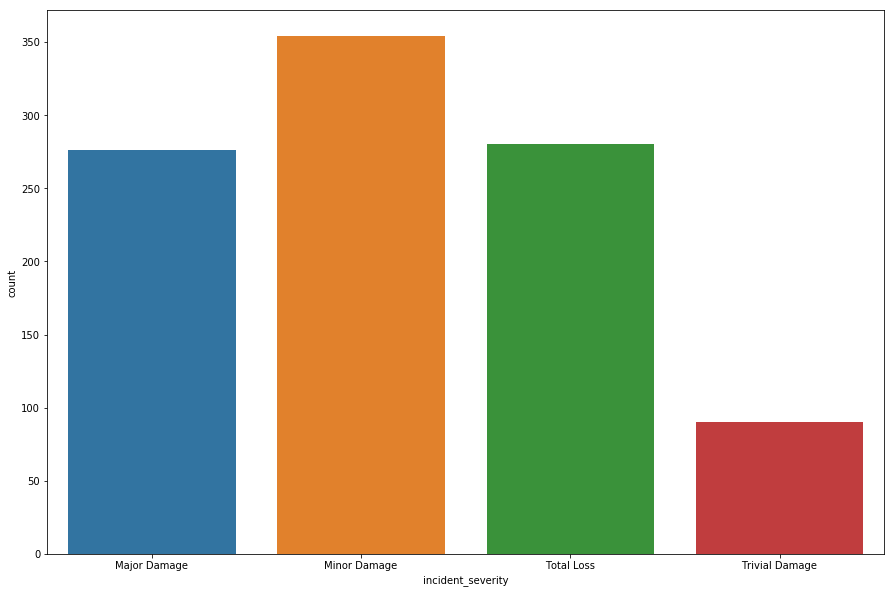

In [306]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="incident_severity",data=df)

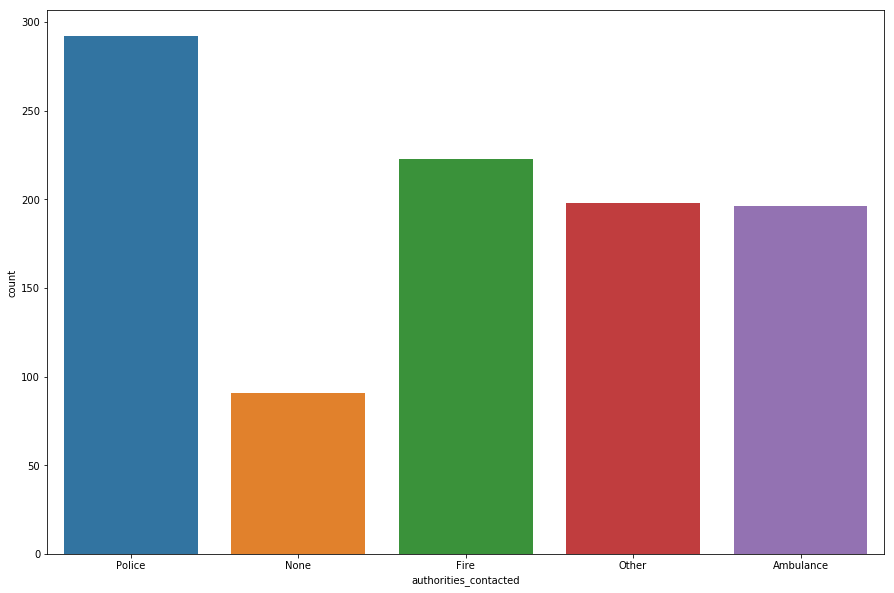

In [307]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="authorities_contacted",data=df)

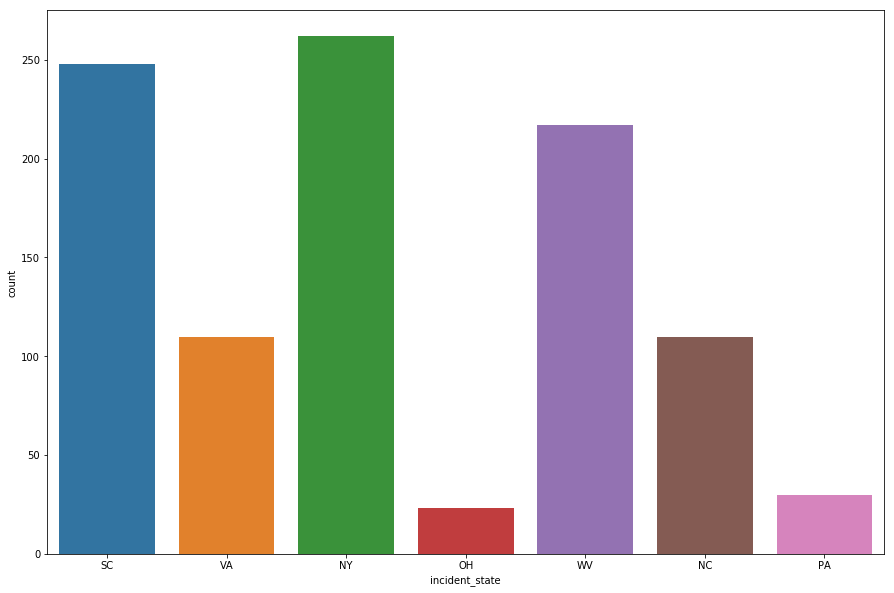

In [308]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="incident_state",data=df)

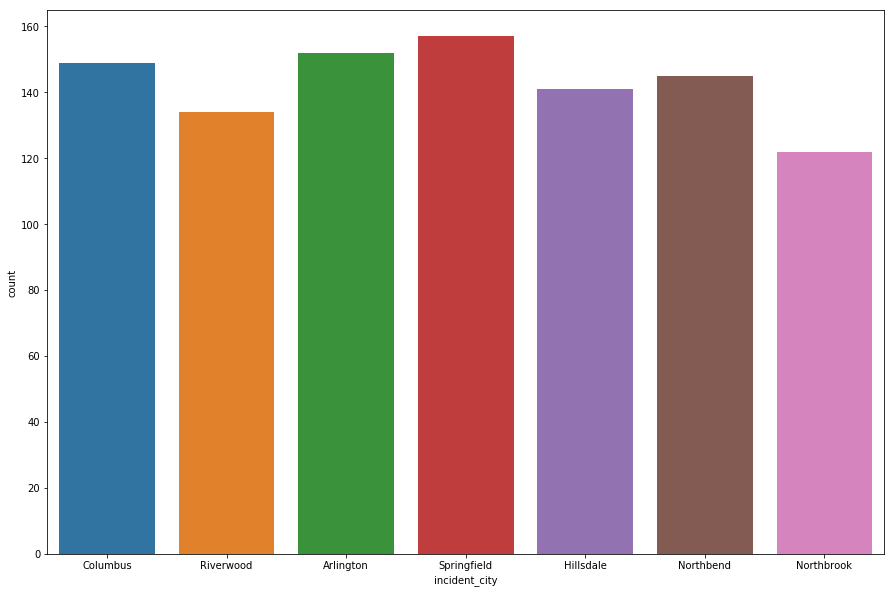

In [309]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="incident_city",data=df)

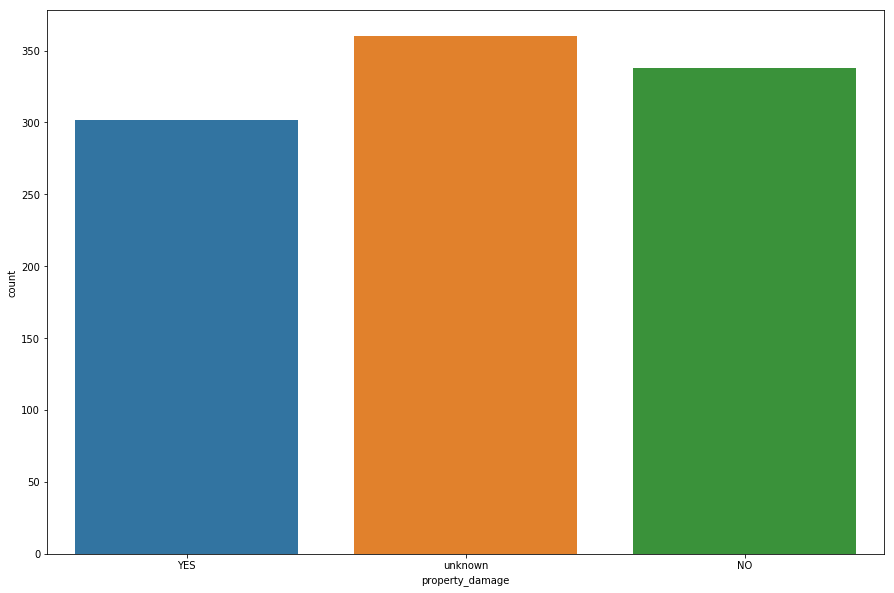

In [310]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="property_damage",data=df)

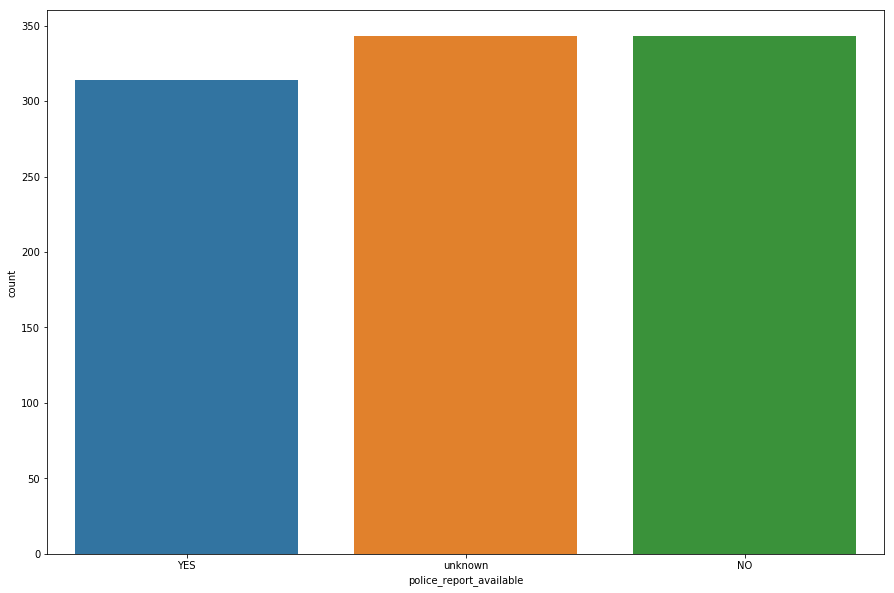

In [311]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="police_report_available",data=df)

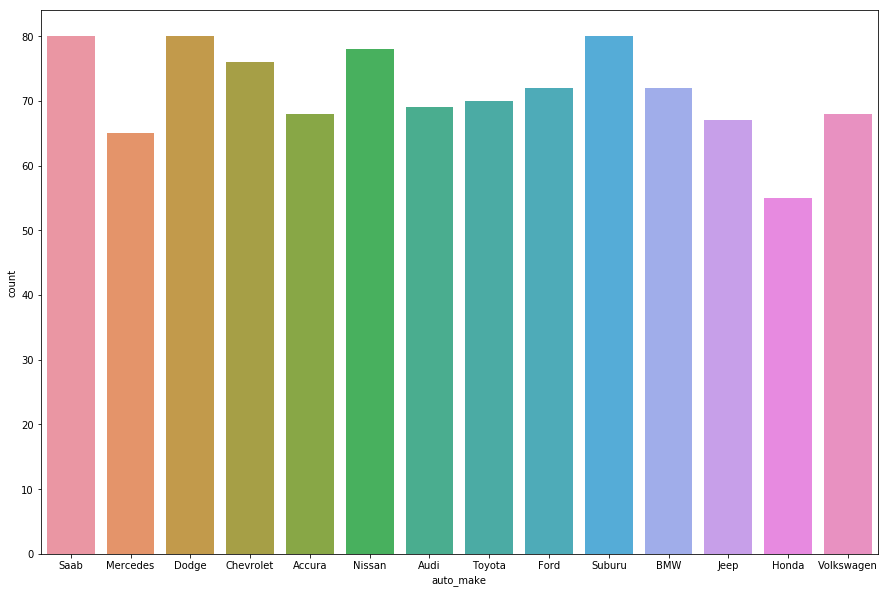

In [312]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="auto_make",data=df)

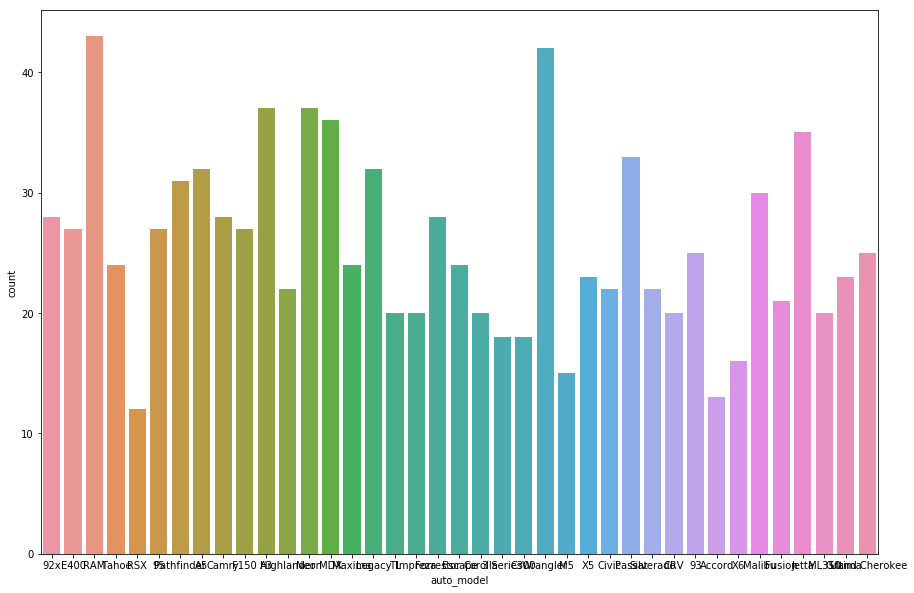

In [313]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="auto_model",data=df)

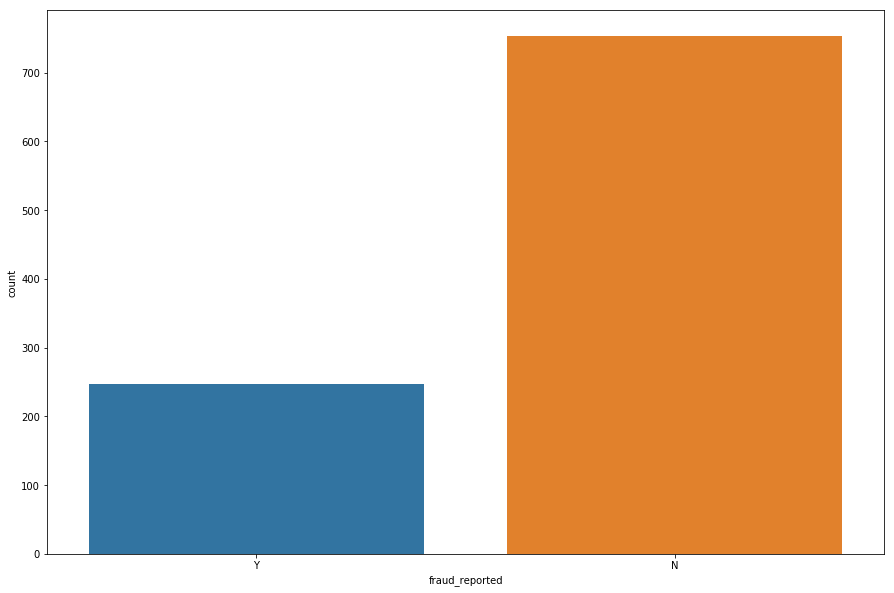

In [314]:
plt.figure(figsize=(15,10),facecolor="white")
sns.countplot(x="fraud_reported",data=df)

In [315]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [316]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,0.965000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,1.487000,1.000000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,0.805247,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,1.111335,0.828666,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,0.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,0.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


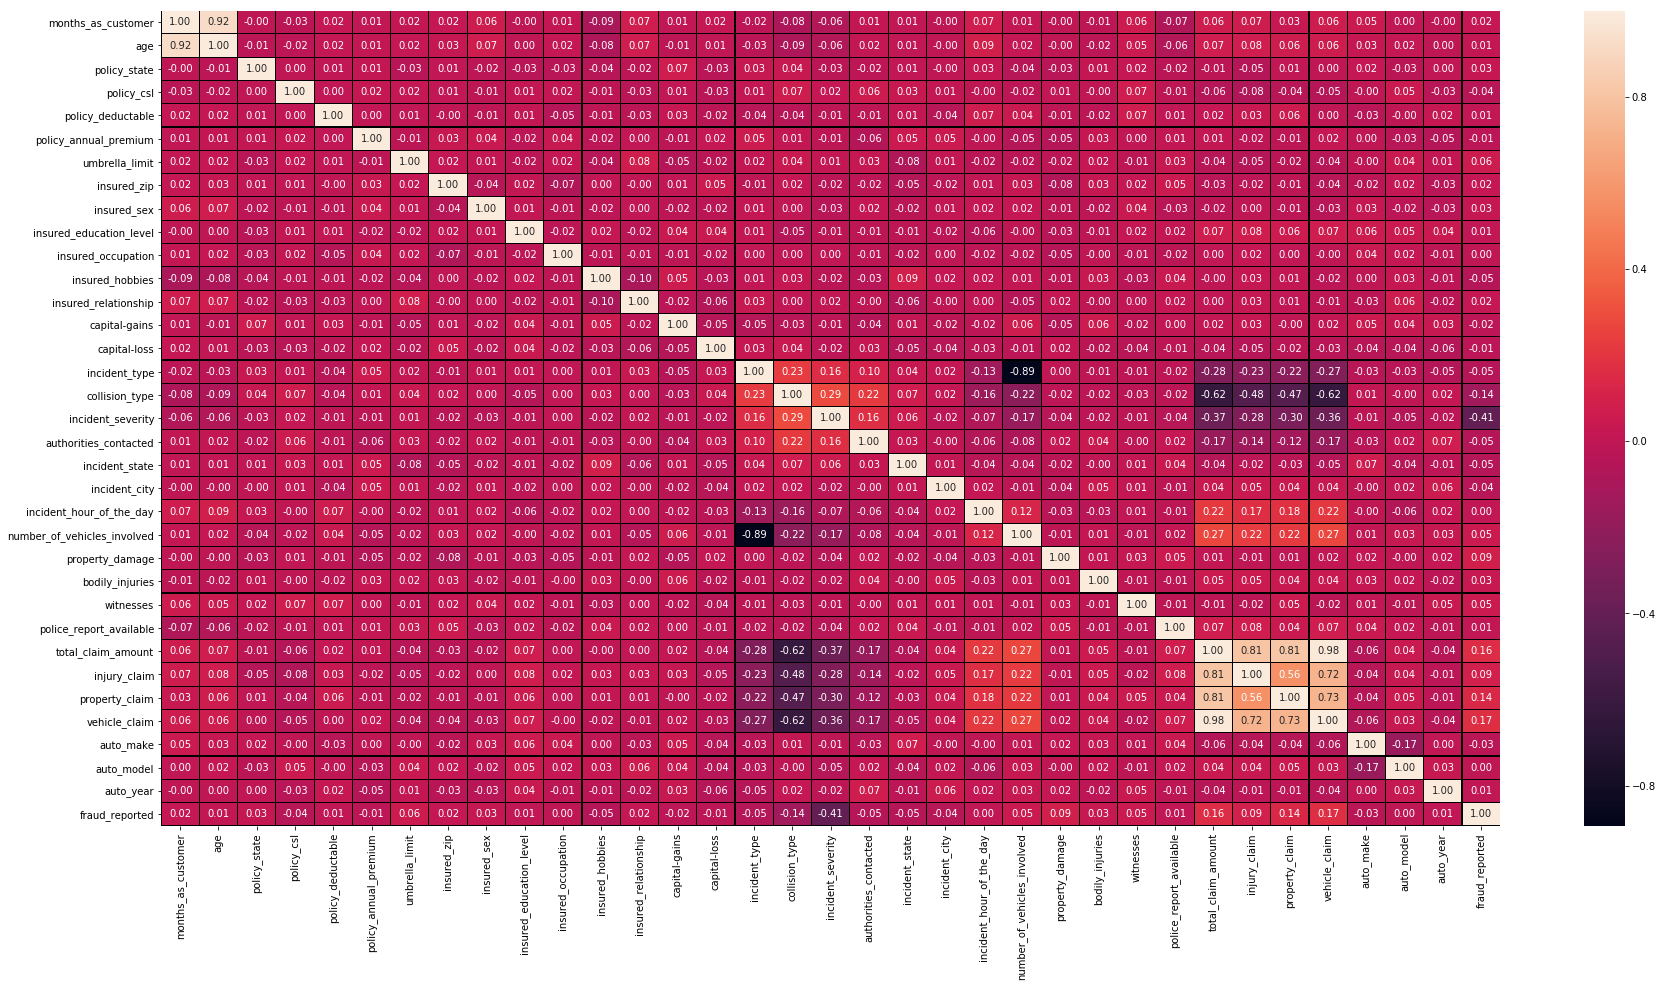

In [317]:
##for the correlation we can understand any particular feature do not have very strong correlation with Income
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

In [318]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.018481,0.005018,0.015498,0.017895,0.060925,-0.000833,...,0.058383,-0.071746,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.020561,0.014404,0.018126,0.025604,0.073337,0.000969,...,0.052359,-0.063040,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.008213,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,0.022960,-0.024713,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.001986,0.023978,0.021636,0.006879,-0.010757,0.009153,...,0.071500,-0.007507,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.018481,0.020561,0.008213,0.001986,1.000000,0.001624,0.006783,-0.001064,-0.011948,0.012000,...,0.074994,0.007501,0.016792,0.034352,0.055172,0.000502,-0.030775,-0.003892,0.024921,0.007620
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,0.001624,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.002332,0.010332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.006783,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,-0.006738,0.034177,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,-0.001064,0.032354,0.019671,1.000000,-0.036942,0.016079,...,0.019805,0.050983,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.011948,0.038853,0.010688,-0.036942,1.000000,0.009002,...,0.042463,-0.029056,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.012000,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,0.019211,0.016119,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808


In [319]:
y=df["fraud_reported"]
x=df.drop("fraud_reported",axis=1)

In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [321]:
Maxr2=0
BestRs=0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    accu=accuracy_score(pred,ytest)
    if accu>Maxr2:
        Maxr2=accu
        BestRs=i
print("with random state as",BestRs,"max accuracy is",Maxr2)

with random state as 16 max accuracy is 0.8066666666666666


In [322]:
##accuracy_score for logistic Regression is maximuum at randomstate 16

In [323]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=16)
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89       300
         1.0       0.00      0.00      0.00         0

    accuracy                           0.81       300
   macro avg       0.50      0.40      0.45       300
weighted avg       1.00      0.81      0.89       300

0.8066666666666666
[[242  58]
 [  0   0]]


In [324]:
#Considering the F!_score which .78 thus providing 81% efficient logistic regression model

In [325]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(xtrain,ytrain)
pred=RFC.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       252
         1.0       0.40      0.48      0.43        48

    accuracy                           0.80       300
   macro avg       0.65      0.67      0.66       300
weighted avg       0.82      0.80      0.81       300

0.8
[[217  35]
 [ 25  23]]


In [326]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
pred=dtc.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       225
         1.0       0.57      0.44      0.50        75

    accuracy                           0.78       300
   macro avg       0.70      0.66      0.68       300
weighted avg       0.76      0.78      0.77       300

0.7766666666666666
[[200  25]
 [ 42  33]]


In [327]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
pred=svc.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89       300
         1.0       0.00      0.00      0.00         0

    accuracy                           0.81       300
   macro avg       0.50      0.40      0.45       300
weighted avg       1.00      0.81      0.89       300

0.8066666666666666
[[242  58]
 [  0   0]]


In [334]:
from sklearn.model_selection import cross_val_score
model=[lr,RFC,dtc,svc]

for model in model:
    print(cross_val_score(model,x,y,cv=5,scoring="f1").mean())

0.007692307692307693
0.43826582304131945
0.5821509765848403
0.0


In [335]:
#from cross val score it can be infered that Decision Tree is the best model to proceed with
#Now we will proceed with parameter tuning
##so we will proceed with parameter

In [337]:
import numpy as np
from sklearn.model_selection import GridSearchCV
parameter={"max_depth":np.arange(2,10),"criterion":["gini", "entropy"],"max_features":["auto","sqrt","log2"]}
grid=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_score_)
print(grid.best_params_)

0.7928571428571429
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}


In [338]:
#from the grid search it can be identied that what are the best parameters.
#{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 34}
#Now parameters can be used to develop final model

finaldtc=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features='log2')
finaldtc.fit(xtrain,ytrain)
pred=finaldtc.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90       278
         1.0       0.22      0.59      0.32        22

    accuracy                           0.82       300
   macro avg       0.59      0.71      0.61       300
weighted avg       0.91      0.82      0.85       300

0.82
[[233  45]
 [  9  13]]


In [339]:
##Final model has F1_score as .82 thus proving 82% accuracy
##Now final model can be saved using joblib
import joblib
joblib.dump(finaldtc,"insurance_fraud_detection.obj")

['insurance_fraud_detection.obj']